In [1]:
from ast import arg

import matplotlib.cbook as cbook
import random
import copy
import os

import numpy as np
import json
import matplotlib.pyplot as plt
from collections import defaultdict
from matplotlib.font_manager import FontProperties
import matplotlib.ticker as ticker

In [24]:
mu = 1
muName = int(mu*10)
filename = f'htc_sir_ini1_result_all_mu{muName}_avNode'
with open(f'{filename}.json', 'r') as f:
    result = json.load(f)
maxEsize = {    
    1:25, 2:81, 3:107, 4:230, 5:83, 6:99, 7:31, 8:37, 9:25, 10:16,
    11:13, 12:10, 13:7, 14:10, 15:10, 16:7, 17:124, 18:104, 19:58, 20:157
}

1 0 0.04


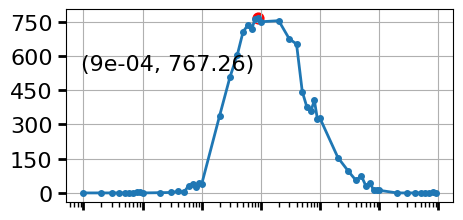

1 1 0.25


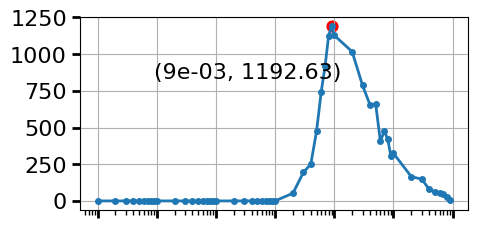

1 2 0.5


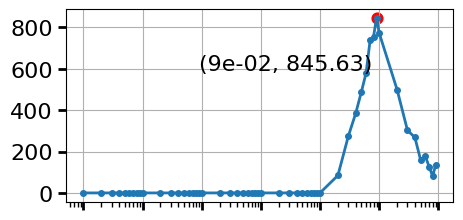

2 0 0.012345679012345678


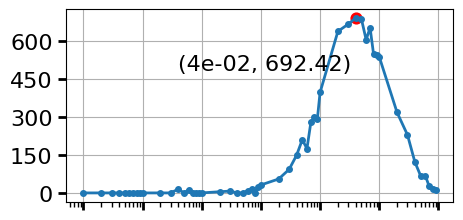

2 1 0.25


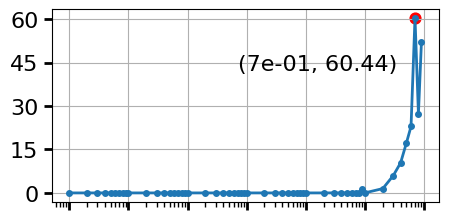

2 2 0.5


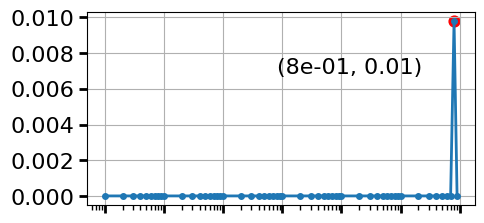

3 0 0.009345794392523364


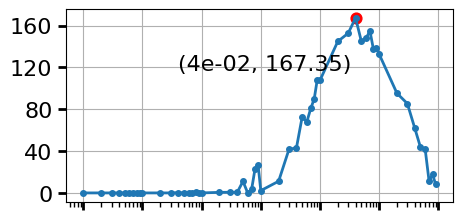

3 1 0.25


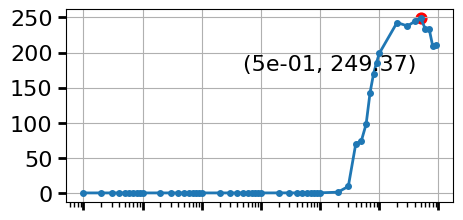

3 2 0.5


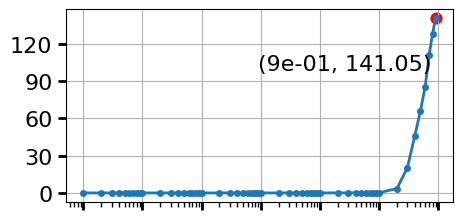

4 0 0.004347826086956522


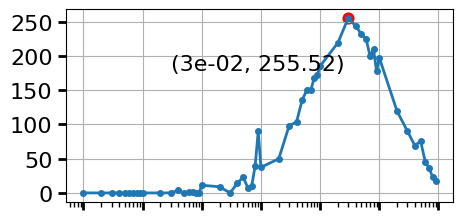

4 1 0.25


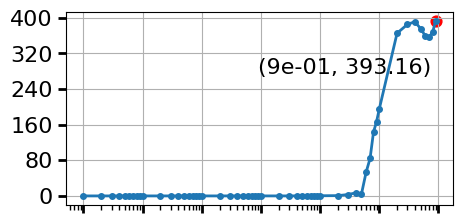

4 2 0.5


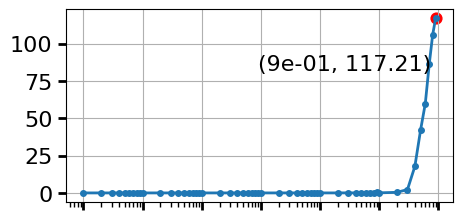

5 0 0.012048192771084338


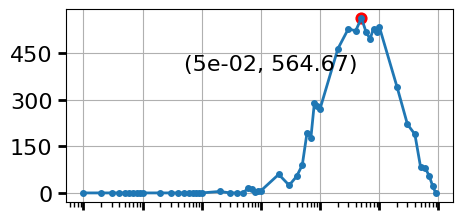

5 1 0.25


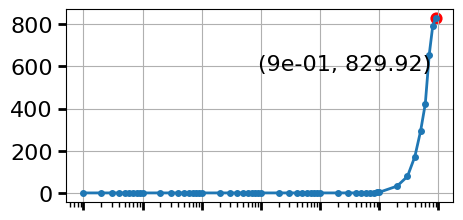

5 2 0.5


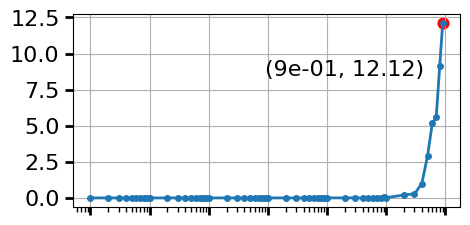

6 0 0.010101010101010102


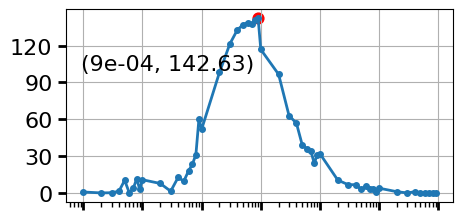

6 1 0.25


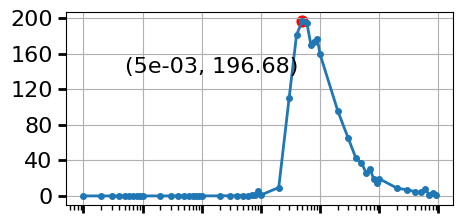

6 2 0.5


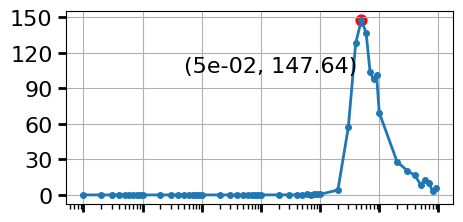

7 0 0.03225806451612903


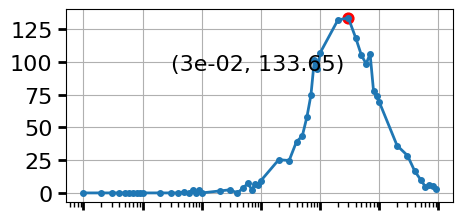

7 1 0.25


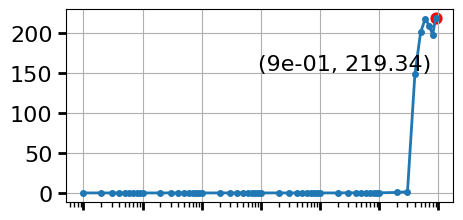

7 2 0.5


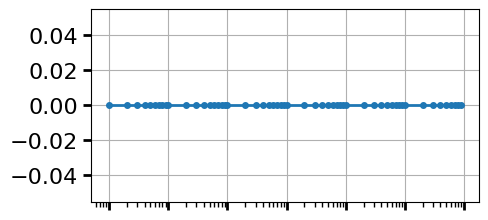

8 0 0.02702702702702703


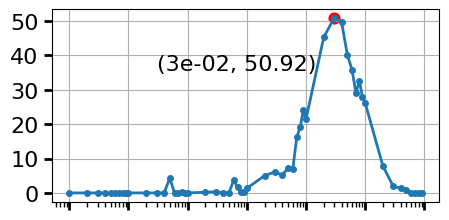

8 1 0.25


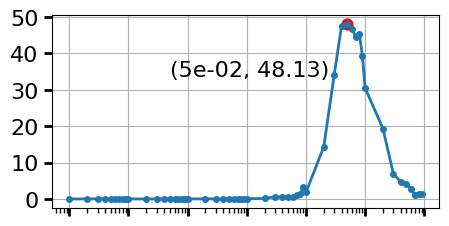

8 2 0.5


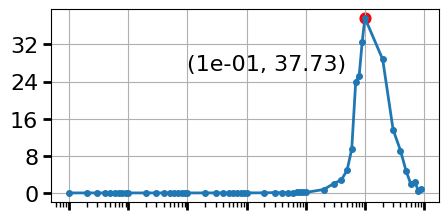

9 0 0.04


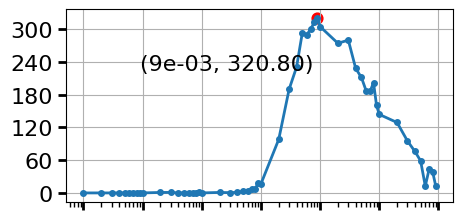

9 1 0.25


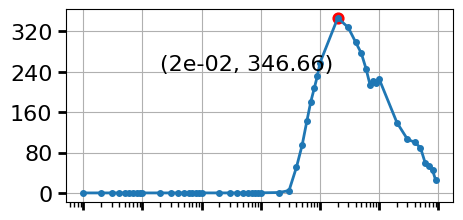

9 2 0.5


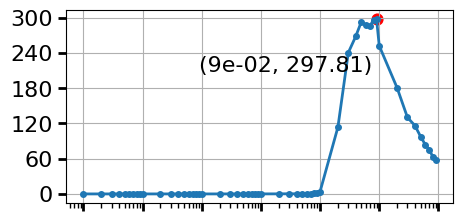

10 0 0.0625


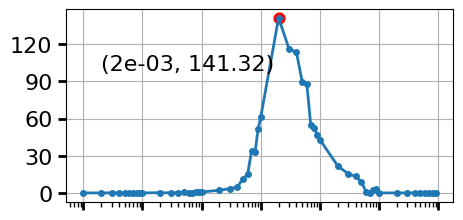

10 1 0.25


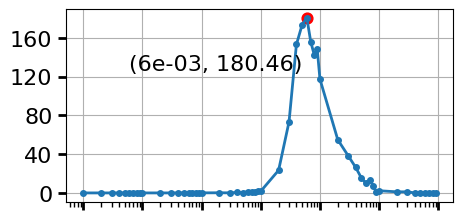

10 2 0.5


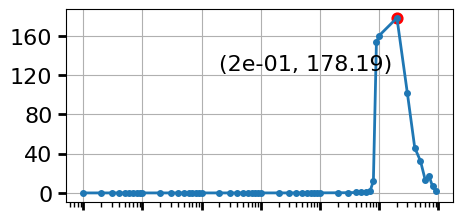

11 0 0.07692307692307693


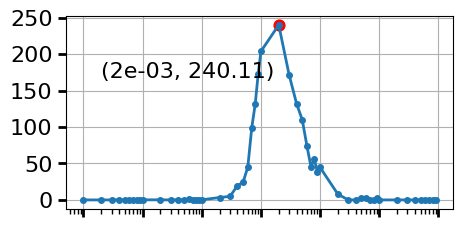

11 1 0.25


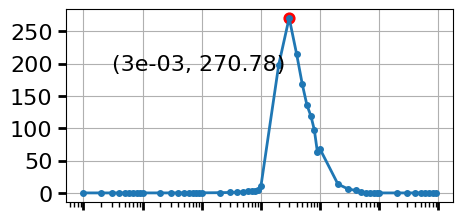

11 2 0.5


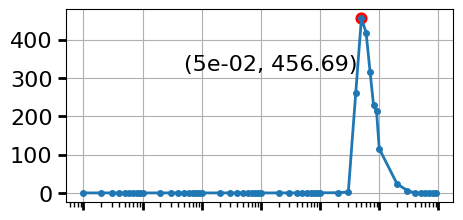

12 0 0.1


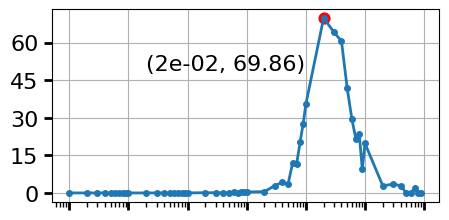

12 1 0.25


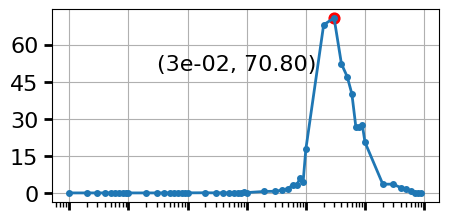

12 2 0.5


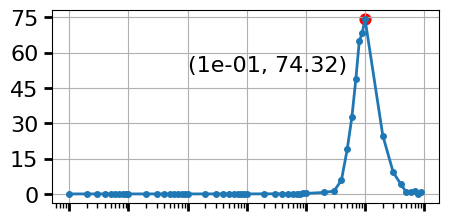

13 0 0.14285714285714285


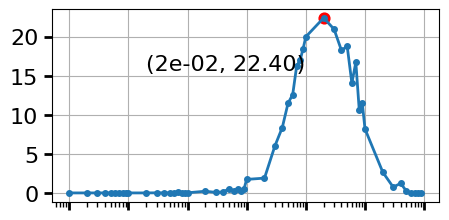

13 1 0.25


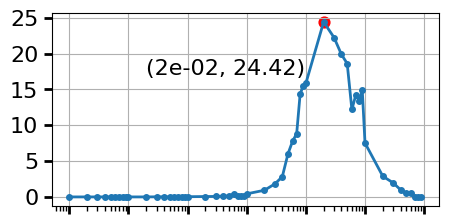

13 2 0.5


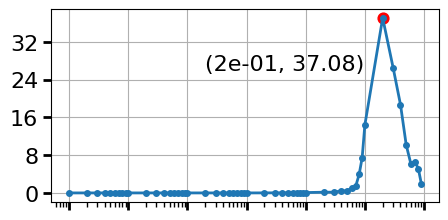

14 0 0.1


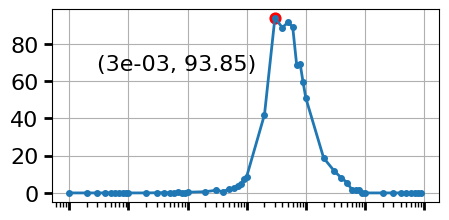

14 1 0.25


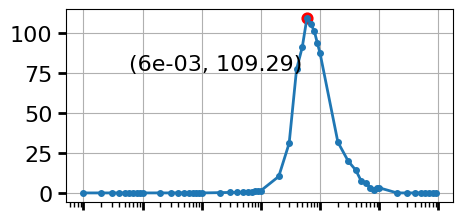

14 2 0.5


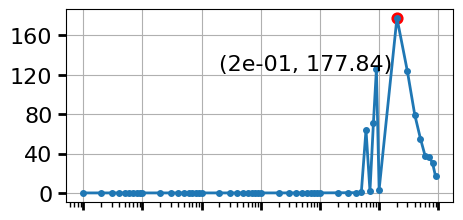

15 0 0.1


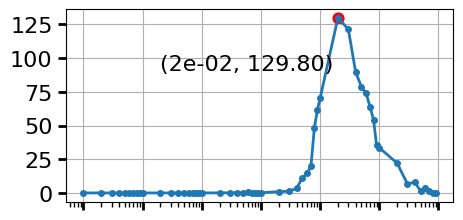

15 1 0.25


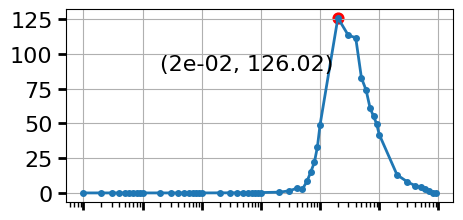

15 2 0.5


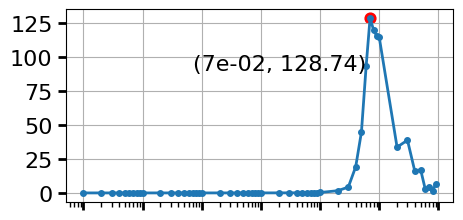

16 0 0.14285714285714285


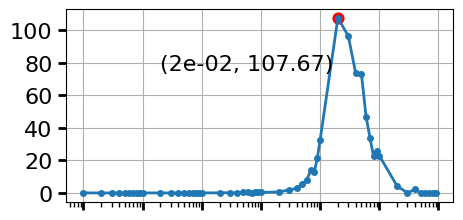

16 1 0.25


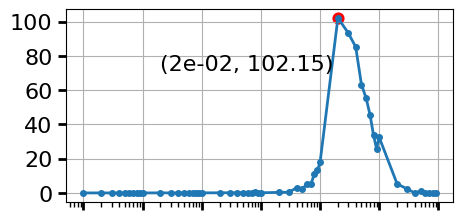

16 2 0.5


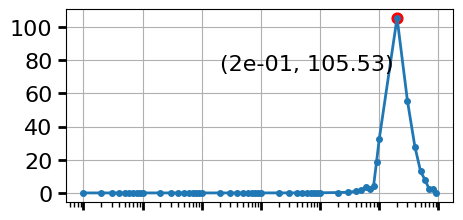

17 0 0.008064516129032258


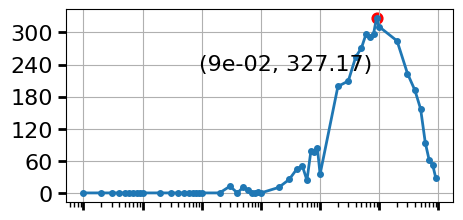

17 1 0.25


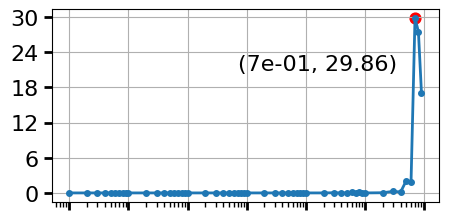

17 2 0.5


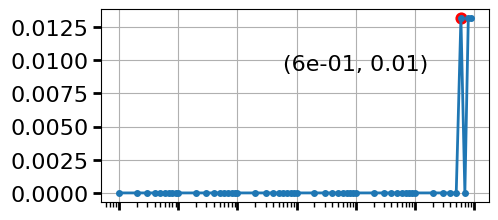

18 0 0.009615384615384616


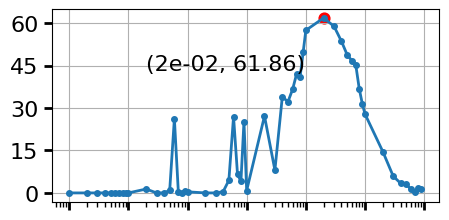

18 1 0.25


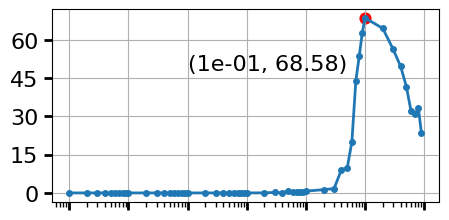

18 2 0.5


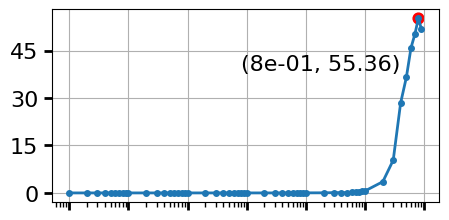

19 0 0.017241379310344827


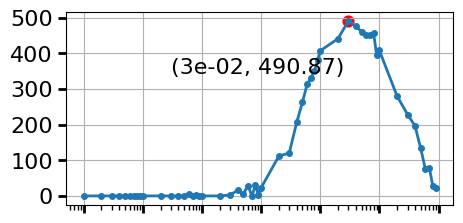

19 1 0.25


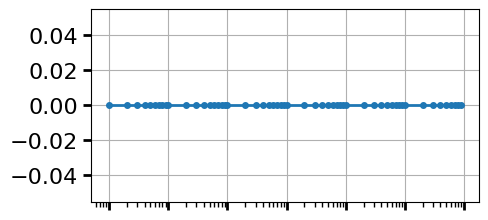

19 2 0.5


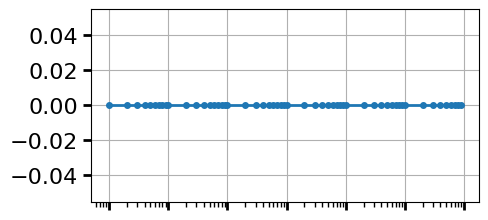

20 0 0.006369426751592357


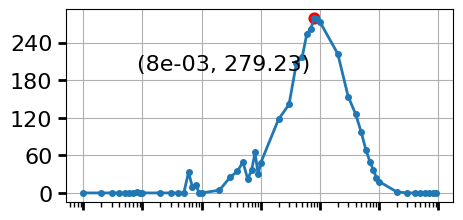

20 1 0.25


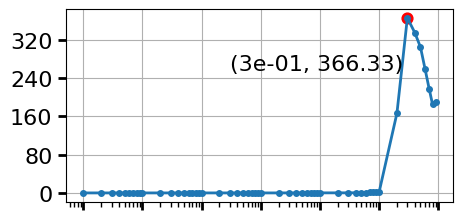

20 2 0.5


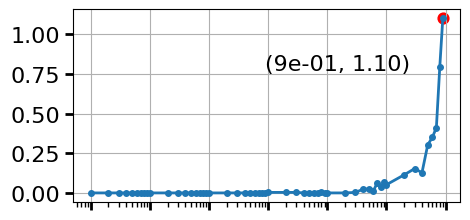

In [26]:
lLst = [
    1e-6, 2e-6, 3e-6, 4e-6, 5e-6, 6e-6, 7e-6, 8e-6, 9e-6,
    1e-5, 2e-5, 3e-5, 4e-5, 5e-5, 6e-5, 7e-5, 8e-5, 9e-5,
    1e-4, 2e-4, 3e-4, 4e-4, 5e-4, 6e-4, 7e-4, 8e-4, 9e-4,
    1e-3, 2e-3, 3e-3, 4e-3, 5e-3, 6e-3, 7e-3, 8e-3, 9e-3, 
    1e-2, 2e-2, 3e-2, 4e-2, 5e-2, 6e-2, 7e-2, 8e-2, 9e-2, 
    1e-1, 2e-1, 3e-1, 4e-1, 5e-1, 6e-1, 7e-1, 8e-1, 9e-1,
    ]
fontsize1 = 16
argmaxDic = dict()
y_dic = dict()
for net in range(1,21):
    argmaxDic[net] = dict()
    for nu, theta in enumerate([1/maxEsize[net], 1/4, 1/2]):
        y_dic[f'net{net}_theta{theta}'] = []
        argmax = (0, 0)
        for _ in lLst:
            y_dic[f'net{net}_theta{theta}'].append(result[f'net{net}_theta{theta}_lbd{_}'])
            if result[f'net{net}_theta{theta}_lbd{_}'] > argmax[1]:
                argmax = (_, result[f'net{net}_theta{theta}_lbd{_}'])
        argmaxDic[net][nu] = argmax[0]
        plt.figure(figsize=(5,2.5))
        plt.plot(lLst, y_dic[f'net{net}_theta{theta}'],marker='o', markersize=4 , markevery=1, linewidth=2)
        # plt.plot(lLst, y_dic[f'net{net}_nu{nu}'],marker='o', markersize=5 , markevery=9, linewidth=2)
        # plt.scatter(lLst, y_dic[f'net{net}_nu{nu}'],marker='o', s=10)
        plt.scatter(argmax[0], argmax[1], color='red', s=60)
        plt.xscale('log')  
        font_prop = FontProperties()
        font_prop.set_size(16)
        plt.annotate(f'({argmax[0]:.0e}, {argmax[1]:.2f})', xy=(0.001*argmax[0],0.7*argmax[1]), fontproperties=font_prop)
        plt.tick_params(axis='y', labelsize=fontsize1)  
        # plt.tick_params(axis='x', labelsize=fontsize1)
        plt.tick_params(axis='y', which='major', size=6, width=2)  
        plt.tick_params(axis='x', which='major', size=6, width=2)  
        plt.tick_params(axis='x', which='minor', size=3.5, width=1)  
        plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(nbins=6))
        # plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=7)) 
        plt.grid()
        plt.gca().set_xticklabels([])
        print(net,nu,theta)
        muName = int(mu*10)
        plt.savefig(f'savefig_si_HTC_lc/lc_mu{muName}_net{net}_thetaID{nu}_grid.svg', format='svg', bbox_inches='tight',dpi=300)
        plt.show()


2 0 0.012345679012345678


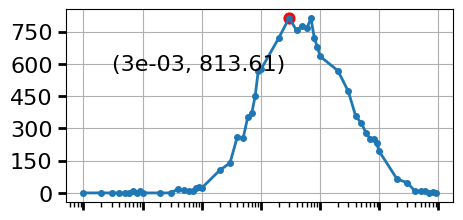

2 1 0.25


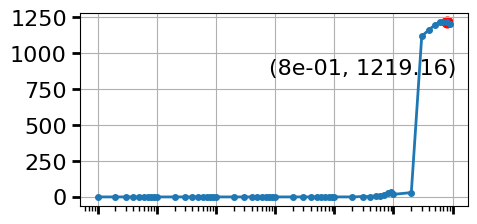

2 2 0.5


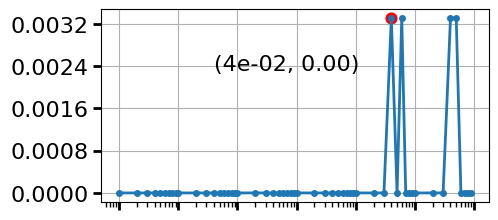

3 0 0.009345794392523364


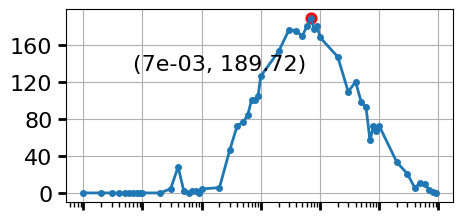

3 1 0.25


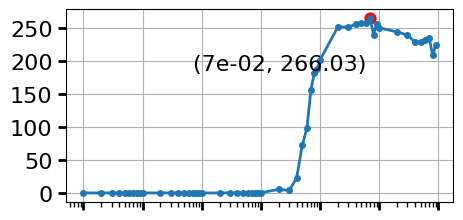

3 2 0.5


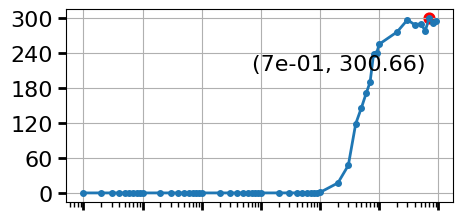

4 0 0.004347826086956522


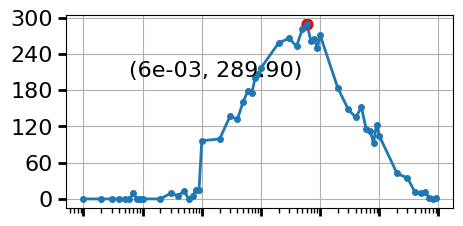

4 1 0.25


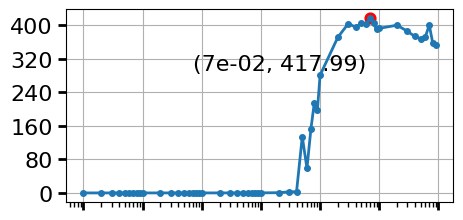

4 2 0.5


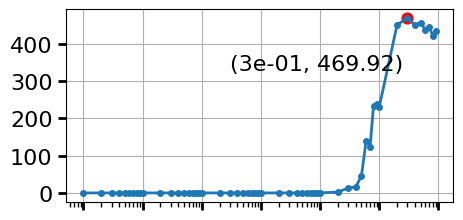

5 0 0.012048192771084338


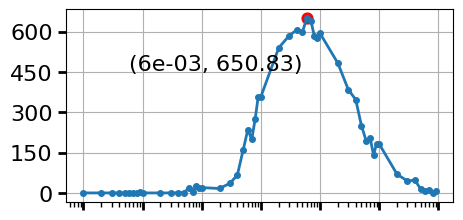

5 1 0.25


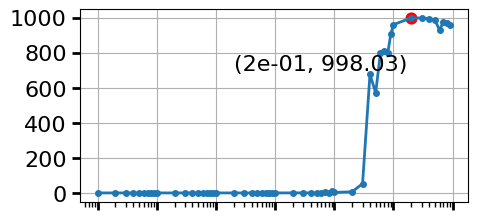

5 2 0.5


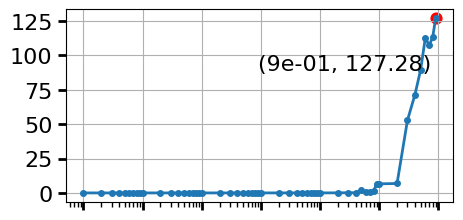

7 0 0.03225806451612903


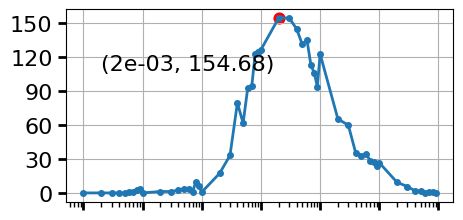

7 1 0.25


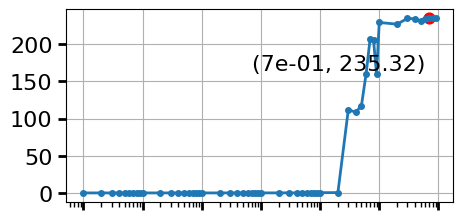

7 2 0.5


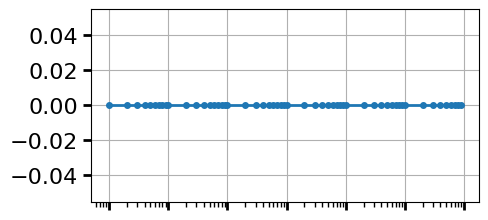

17 0 0.008064516129032258


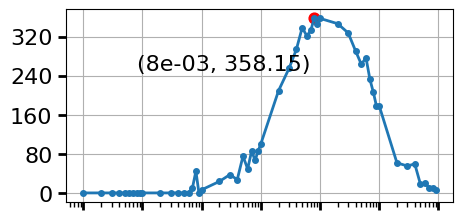

17 1 0.25


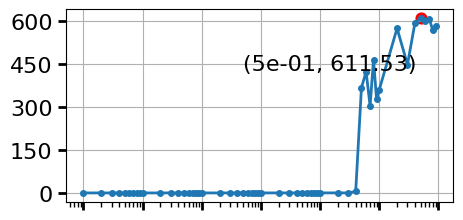

17 2 0.5


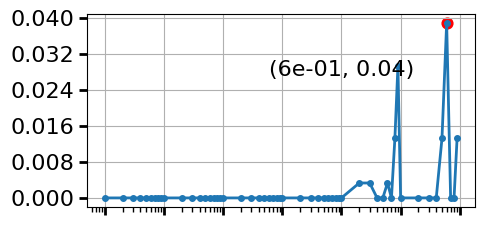

18 0 0.009615384615384616


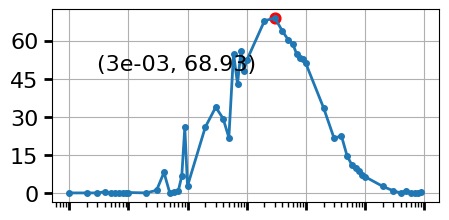

18 1 0.25


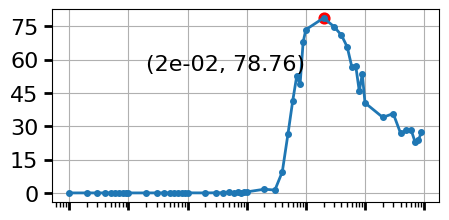

18 2 0.5


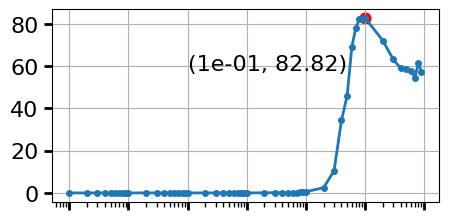

20 0 0.006369426751592357


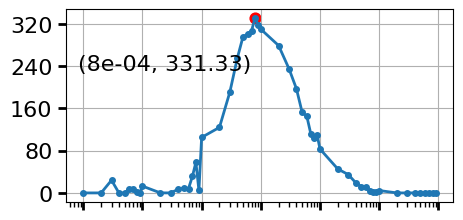

20 1 0.25


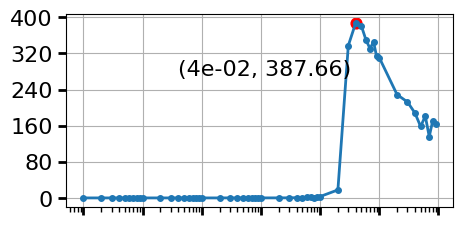

20 2 0.5


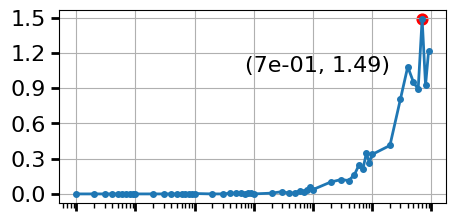

In [23]:
# redrawn:(2,1),(2,2),(3,1),(3,2).(4,1),(4,2),(5,1),
# (5,2),(7,1),(10,2),(17,1),(17,2),(18,2),(20,1),
netRe = dict()
netRe[0.1] = [2,3,4,5,7,17,18,20]
# netRe[1] = [6,9,10,11,12,13,14,15,16]  
# netRe[1] = [8,18,20]  
# netRe[1] = [2,3,4,5,7,17]  

mu=0.1
lLst = [
    1e-6, 2e-6, 3e-6, 4e-6, 5e-6, 6e-6, 7e-6, 8e-6, 9e-6,
    1e-5, 2e-5, 3e-5, 4e-5, 5e-5, 6e-5, 7e-5, 8e-5, 9e-5,
    1e-4, 2e-4, 3e-4, 4e-4, 5e-4, 6e-4, 7e-4, 8e-4, 9e-4,
    1e-3, 2e-3, 3e-3, 4e-3, 5e-3, 6e-3, 7e-3, 8e-3, 9e-3, 
    1e-2, 2e-2, 3e-2, 4e-2, 5e-2, 6e-2, 7e-2, 8e-2, 9e-2, 
    1e-1, 2e-1, 3e-1, 4e-1, 5e-1, 6e-1, 7e-1, 8e-1, 9e-1,
    ]
fontsize1 = 16
argmaxDic = dict()
y_dic = dict()
for net in netRe[mu]:
    argmaxDic[net] = dict()
    for nu, theta in enumerate([1/maxEsize[net],1/4, 1/2]):  # 
        y_dic[f'net{net}_theta{theta}'] = []
        argmax = (0, 0)
        for _ in lLst:
            y_dic[f'net{net}_theta{theta}'].append(result[f'net{net}_theta{theta}_lbd{_}'])
            if result[f'net{net}_theta{theta}_lbd{_}'] > argmax[1]:
                argmax = (_, result[f'net{net}_theta{theta}_lbd{_}'])
        argmaxDic[net][nu] = argmax[0]
        plt.figure(figsize=(5,2.5))
        plt.plot(lLst, y_dic[f'net{net}_theta{theta}'],marker='o', markersize=4 , markevery=1, linewidth=2)
        plt.scatter(argmax[0], argmax[1], color='red', s=60)
        plt.xscale('log') 
        font_prop = FontProperties()
        font_prop.set_size(16) 
        plt.annotate(f'({argmax[0]:.0e}, {argmax[1]:.2f})', xy=(0.001*argmax[0],0.7*argmax[1]), fontproperties=font_prop)
        plt.tick_params(axis='y', labelsize=fontsize1)  
        # plt.tick_params(axis='x', labelsize=fontsize1)
        plt.tick_params(axis='y', which='major', size=6, width=2)  
        plt.tick_params(axis='x', which='major', size=6, width=2)  
        plt.tick_params(axis='x', which='minor', size=3.5, width=1) 
        plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(nbins=6))
        # plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=7)) 
        plt.grid()
        plt.gca().set_xticklabels([])
        print(net,nu,theta)
        muName = int(mu*10)
        plt.savefig(f'savefig_si_HTC_lc/lc_mu{muName}_net{net}_thetaID{nu}_grid.svg', format='svg', bbox_inches='tight',dpi=300)
        plt.show()


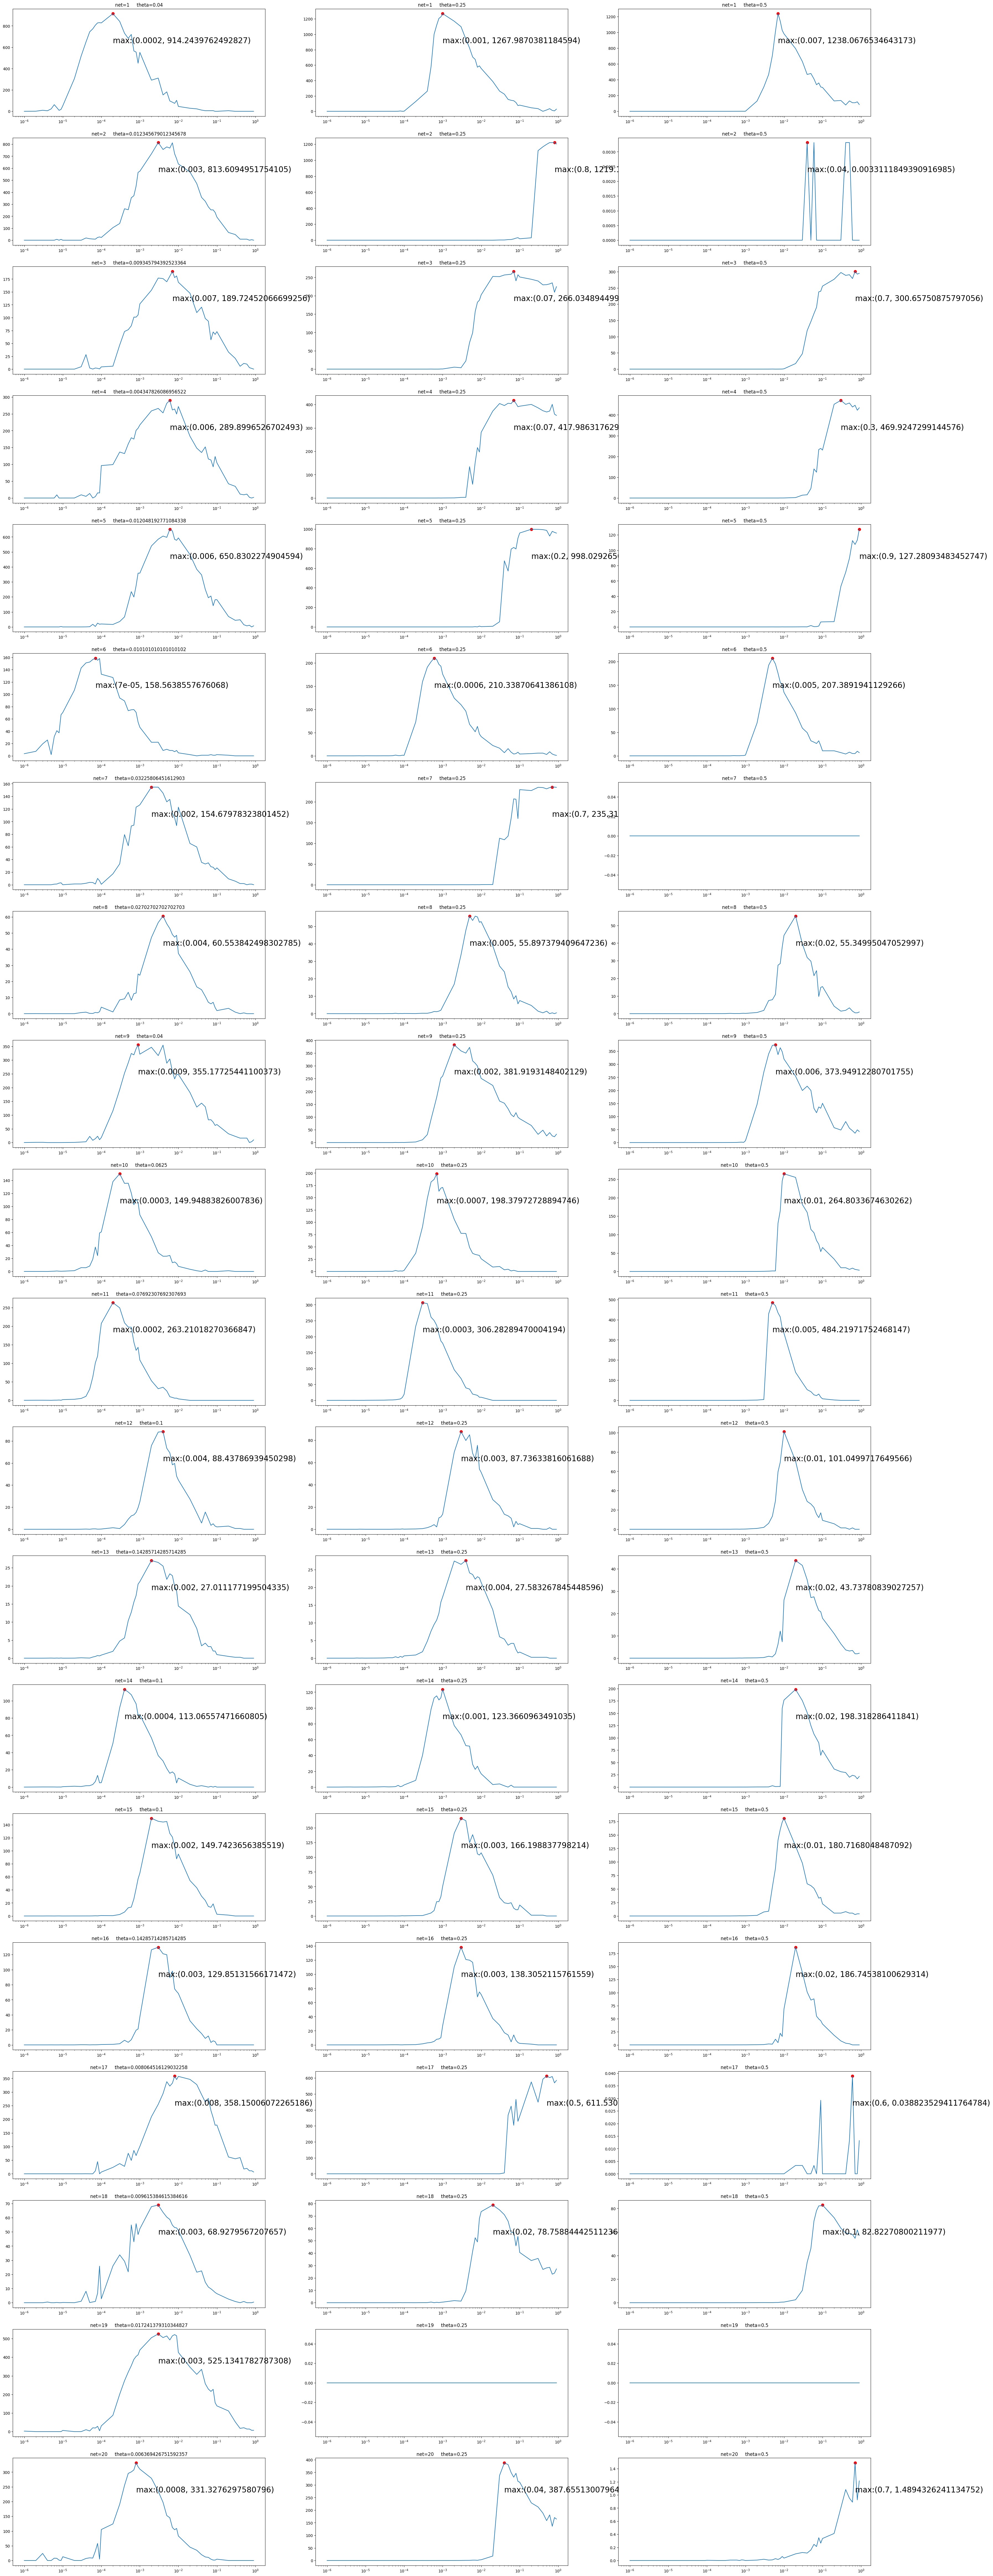

In [12]:
lbdLst = [
    1e-6, 2e-6, 3e-6, 4e-6, 5e-6, 6e-6, 7e-6, 8e-6, 9e-6,
    1e-5, 2e-5, 3e-5, 4e-5, 5e-5, 6e-5, 7e-5, 8e-5, 9e-5,
    1e-4, 2e-4, 3e-4, 4e-4, 5e-4, 6e-4, 7e-4, 8e-4, 9e-4,
    1e-3, 2e-3, 3e-3, 4e-3, 5e-3, 6e-3, 7e-3, 8e-3, 9e-3, 
    1e-2, 2e-2, 3e-2, 4e-2, 5e-2, 6e-2, 7e-2, 8e-2, 9e-2, 
    1e-1, 2e-1, 3e-1, 4e-1, 5e-1, 6e-1, 7e-1, 8e-1, 9e-1,
    ]
# fig = plt.figure(figsize=(8, 6))
fig, ax = plt.subplots(nrows=20, ncols=3, figsize=(40, 120))
# for i, ax in enumerate(axes.flat):
argmaxDic = dict()
y_dic = dict()
for net in range(1,21): # 
    argmaxDic[net] = dict()
    for nu, theta in enumerate([1/maxEsize[net], 1/4, 1/2]):
        y_dic[f'net{net}_theta{theta}'] = []
        argmax = (0, 0)
        for _ in lbdLst:
            y_dic[f'net{net}_theta{theta}'].append(result[f'net{net}_theta{theta}_lbd{_}'])
            if result[f'net{net}_theta{theta}_lbd{_}'] > argmax[1]:
                argmax = (_, result[f'net{net}_theta{theta}_lbd{_}'])
        argmaxDic[net][nu] = argmax[0]
        ax[net-1,nu].plot(lbdLst, y_dic[f'net{net}_theta{theta}'])
        ax[net-1,nu].scatter(argmax[0], argmax[1], color='red', s=50)
        font_prop = FontProperties()
        font_prop.set_size(20)
        ax[net-1,nu].annotate(f'max:({argmax[0]}, {argmax[1]})', xy=(argmax[0],0.7*argmax[1]), fontproperties=font_prop)
        ax[net-1,nu].set(title=f'net={net}     theta={theta}')
        ax[net-1,nu].set_xscale('log')  
# fig.suptitle(f'{filename}',fontsize=18, ha='left', va='bottom')
plt.show()